In [1]:
# Ensemble : Model들을 같이 엮어서 사용하는 방법

In [2]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [3]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [87]:
# sampling (데이터가 많으면 p=0.8 써주면 좋음 대부분 0.7 0.75 0.8 많이 씀)
set.seed(1234)
samp <- createDataPartition(iris$Species, p=0.7, list=F)

#학습용 데이터 만들기
data.tr <-iris[samp,]
data.tr
# 검증용 데이터 만들기
data.test <-iris[-samp,]

# 문제 및 정답 만들기
x<- subset(data.test, select=-Species)
y<- data.test$Species


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
15,5.8,4.0,1.2,0.2,setosa


In [5]:
# 학습시키기
model.rf <- randomForest(Species~., data = data.tr, ntree=100)

In [6]:
# 검증하기
pred <- predict(model.rf, x)

In [7]:
# 예측력과 오분류표
mean(pred==y)
table(pred,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기 (회귀식과 RandomForest 예측 비교)

In [8]:
seoul <- read.csv("../Data//newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [9]:
# 종로구 데이터 셋 만들기
JongRo <- subset(seoul, 자치구명=="종로구")
head(JongRo)

#rownames 정리 잊지말기1!!
rownames(JongRo) <-c()

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [10]:
JongRo$자치구명 <-factor(JongRo$자치구명)

In [11]:
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [12]:
# 종로의 발생건수와 부상자수 상관계수

cor(JongRo$부상자수,JongRo$발생건수)

[1] 0.9208914

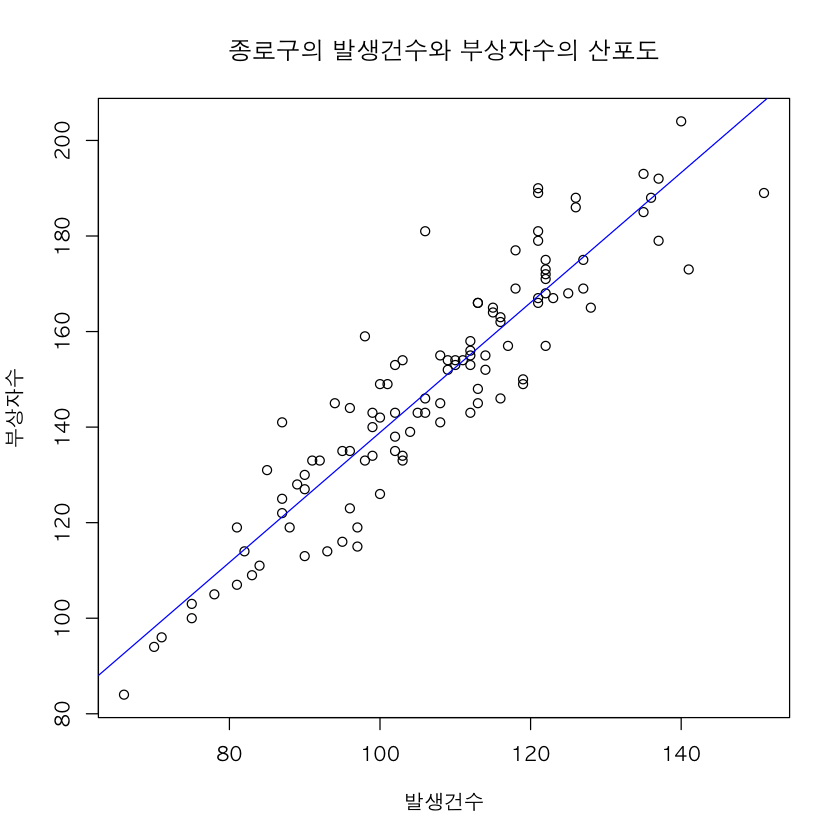

In [23]:
# 종로구의 발생건수와 부상자수의 산포도와 회귀선 그리기 
options(warn = -1)
par(family = "AppleGothic")
plot(JongRo$부상자수~JongRo$발생건수,
    xlab="발생건수",
    ylab="부상자수",
    main ="종로구의 발생건수와 부상자수의 산포도")
r<- lm(JongRo$부상자수~JongRo$발생건수)
abline(r,col="blue")

In [14]:
# 예측력
summary(r)


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
JongRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


 0.8466  <- 84프로의 예측력

In [86]:
# 회귀식
r
# - 발생건수가 100건일 경우의 부상자수 예측 
cat(1.360 *100+ 2.886)



Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


138.886

In [16]:
reduced <- step(r, direction = "backward") 

Start:  AIC=495.34
JongRo$부상자수 ~ JongRo$발생건수

                  Df Sum of Sq   RSS    AIC
<none>                         10215 495.34
- JongRo$발생건수  1     57004 67219 696.83


In [17]:
summary(reduced)


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
JongRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


In [65]:
# 랜덤 포레스트로 예측
# 학습시키기
model.rf <- randomForest(부상자수~발생건수, data = JongRo, ntree=100)

model.rf


Call:
 randomForest(formula = 부상자수 ~ 발생건수, data = JongRo,      ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 125.3325
                    % Var explained: 79.86

In [75]:
발생건수 = 100
x <- data.frame(발생건수)
x

발생건수
100


In [76]:
# -발생건수가 100건일 경우의 부상자수 예측


pred <- predict(model.rf, x)
pred

1 
138.581

In [83]:

y <- data.frame(발생건수=200)
y

발생건수
200


In [84]:
pred <- predict(model.rf, y)
pred

1 
186.316